# Matter Physics Lab
This notebook contains the data analysis for the following wl (wave lenght) spectra:
 1. [Sodium lamp](#sodium-lamp-spectrum); 
 2. [He-Ne laser](#sodium-lamp-spectrum);
 3. [Black Body](#black-body-radiation) at T = 960 C.
   
The spectra are used to characterize the experimental setup.

In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib widget
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib import rcParams
import modules.utils as utils

rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100

## Black Body Radiation
This is the cleaned spectrum of the BB. It's 'cleaned' because the stepper motor encoder reads values with an error and the error stacks. So we took 6 samples of the spectrum and then stacked them together to get the full spectrum with an error that is almost constant accross all the wls.

C:\Users\alber\AppData\Local\Temp\ipykernel_1044\890754673.py:2: ParserWarning: Both a converter and dtype were specified for column meta - only the converter will be used.
  BB_Exp_df = pd.read_csv('Cleaned_Data\\BB_Spectrum\\BB_Radiation_Exp',


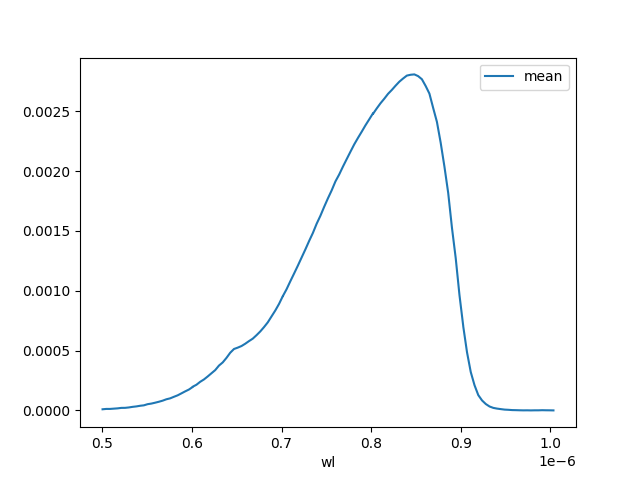

In [17]:
# Black Body dataframe
BB_Exp_df = pd.read_csv('Cleaned_Data\\BB_Spectrum\\BB_Radiation_Exp', 
                        dtype='float64', 
                        converters={'meta' : str})

# convert the wl in meters ! THIS IS IMPORANT
BB_Exp_df['wl'] = BB_Exp_df['wl'] * 1e-10
_ = BB_Exp_df.plot('wl', 'mean')

Fitting dei dati del laboratorio sul modello. In particolare si vuole trovare il coefficiente di proporzionalità tra dati e legge di Planck. Vengono usati tre intervalli diversi per fare il fit 

wl type is <class 'pandas.core.series.Series'>


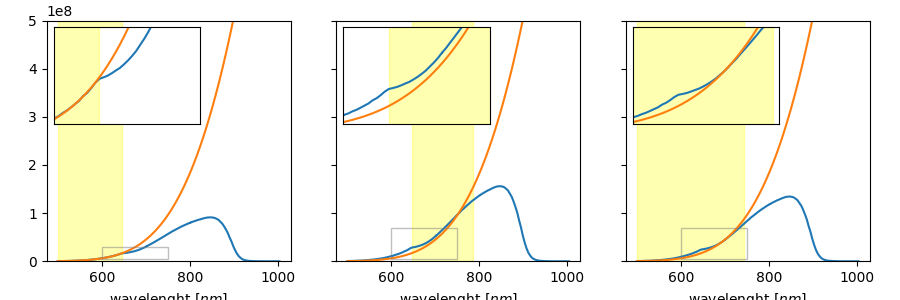

In [26]:
from scipy.optimize import curve_fit

# this function multypiles x by a
fit = lambda x, a :  a * x
wl = BB_Exp_df['wl']
mean = BB_Exp_df['mean']
theo = utils.plank(wl, 1240)
fig, axs = plt.subplots(1,3, sharey='row', figsize=(9,3))
plt.tight_layout()
for ax in axs.flatten():
    ax.set(xlabel = r'wavelenght $[nm]$')

arr_start = [0, 36, 0]
arr_stop =  [36, 70, 60]
arr_zoom = [[.05e8, .3e8 ], 
            [.05e8, .7e8 ], 
            [.05e8, .7e8 ]]

for start, stop, zoom, ax in zip(arr_start, arr_stop, arr_zoom, axs.flatten()):
    # optimize the proportionality coeff
    try:
        popt, pcov = curve_fit(fit, mean[start:stop], theo[start:stop], p0=[1e11], bounds=(1e10, 1e12), method='trf')
    except RuntimeError as e:
        print(e)
    A = popt[0] 

    # plot
    
    ax.plot(wl * 1e9, mean * A)
    ax.plot(wl * 1e9, theo)
    ax.set(ylim=(0,.5e9))
    # color the fitted region
    ax.axvspan(wl[start] * 1e9, wl[stop] * 1e9, color='yellow', alpha=0.3, label='fitted data')

    # Define the area for the zoomed-in square (in data coordinates)
    x1, x2, y1, y2 = 600, 750, *zoom  # Adjust as needed

    # Add the inset zoomed-in plot
    ax_inset = inset_axes(ax, width="60%", height="40%", loc="upper left")  # Location and size of the inset
    ax_inset.plot(wl * 1e9, mean * A)
    ax_inset.plot(wl * 1e9, theo)
    ax_inset.set_xlim(x1, x2)
    ax_inset.set_ylim(y1, y2)
    ax_inset.set_xticks([])
    ax_inset.set_yticks([])
    ax_inset.axvspan(wl[start] * 1e9, wl[stop] * 1e9, color='yellow', alpha=0.3, label='fitted data')

    # Add a rectangle on the main plot to show the inset location
    ax.indicate_inset_zoom(ax_inset)

Get the responce function of the system. The first part of the responce it's noisy so it's best to do a linear regression

LinregressResult(slope=1.0558980621858112e-05, intercept=2.4427649202767045e-11, rvalue=0.4284654434809275, pvalue=0.0091297895337034, stderr=3.818764263309045e-06, intercept_stderr=2.191260046001314e-12)


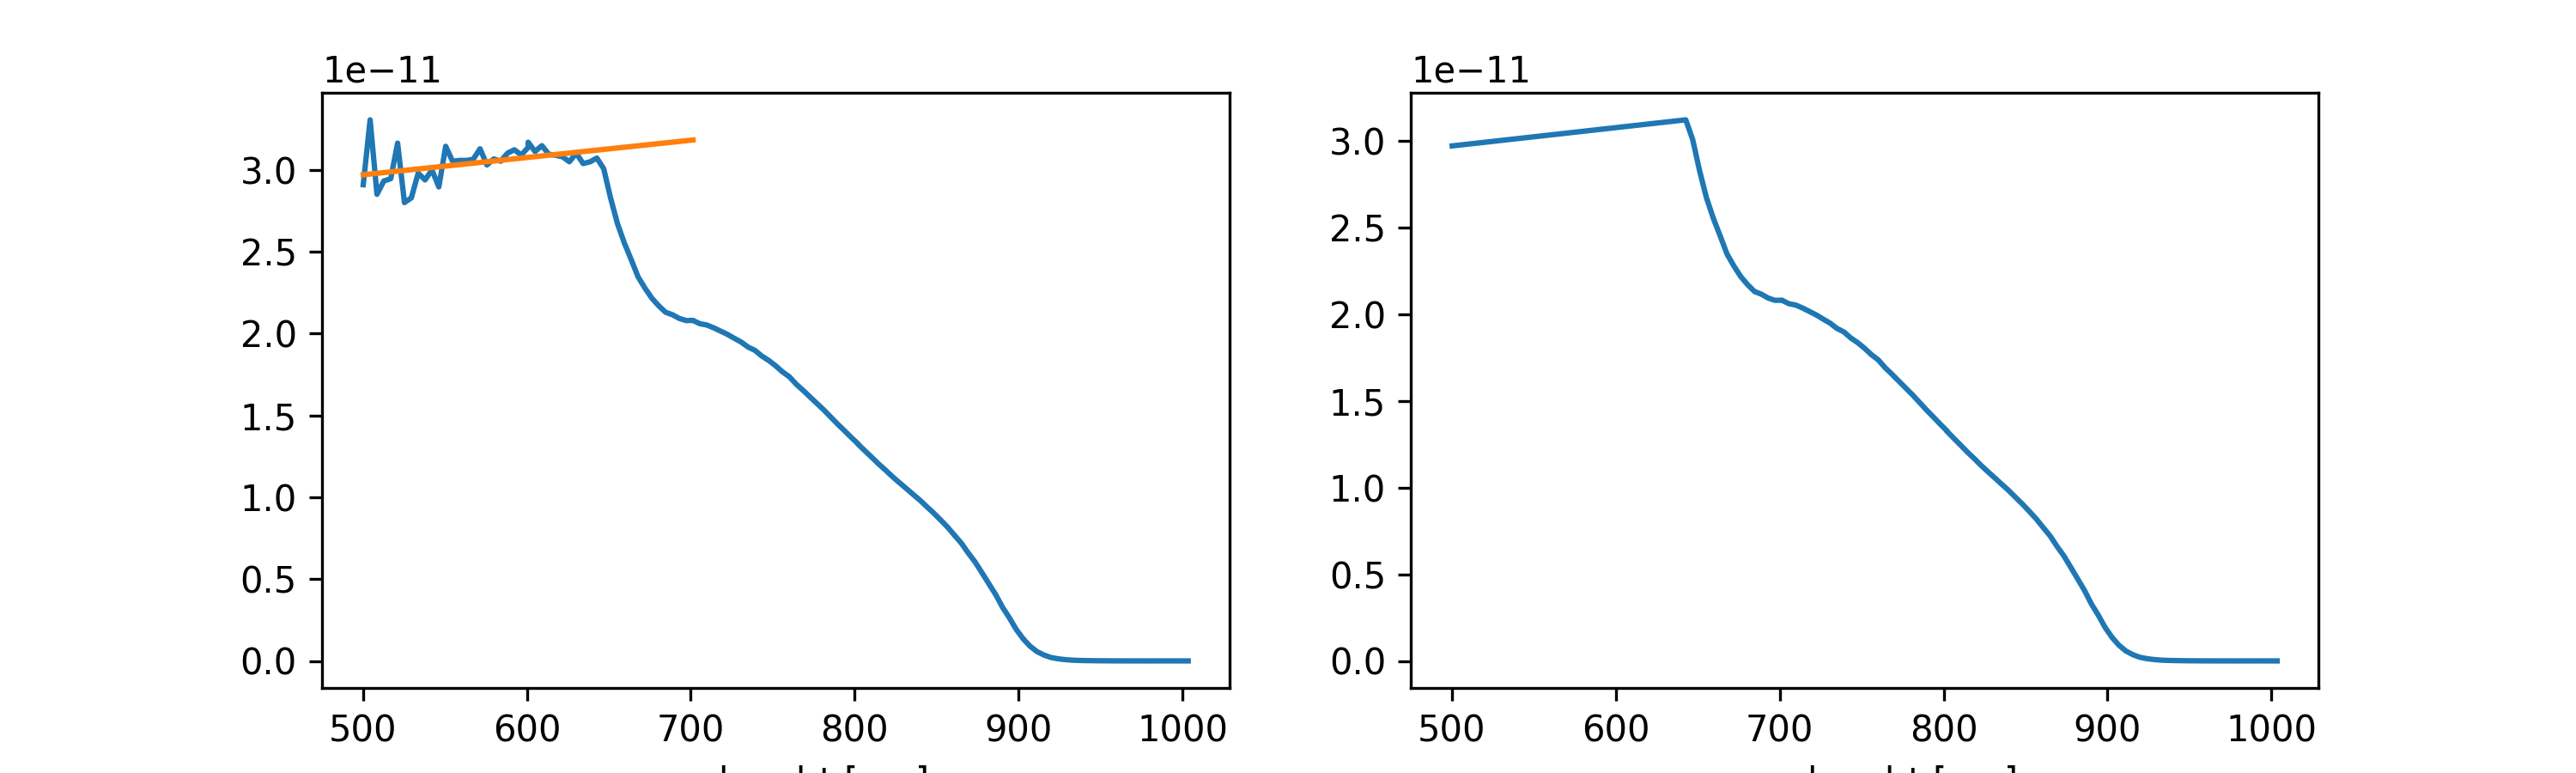

In [19]:
from scipy.stats import linregress

# responce function of the setup
responce = mean / theo

# linear fit of the responce function until
# the discontinuity point (knee) in the data
res = linregress(wl[:36], responce[:36])
print(res)

fig, axs = plt.subplots(1,2,figsize=(10,3), dpi=300)
axs = axs.flatten()
axs[0].plot(wl * 1e9, responce)
axs[0].plot(wl[:50] * 1e9, np.polyval(res[:2],wl[:50]))
axs[0].set(xlabel=r'wavelenght $[nm]$')

# update responce 
responce[:36] = np.polyval(res[:2],wl[:36])
axs[1].plot(wl * 1e9, responce)
_ = axs[1].set(xlabel=r'wavelenght $[nm]$')

## Sodium Lamp Spectrum

In [20]:
from importlib import reload
reload(utils)

Na_files = utils.getFiles('Cleaned_Data\\Na_Spectrum')
print(Na_files)
Na_Exp_df = utils.dfFormFiles(Na_files, 
                                     sep=',',
                                     header=0,
                                     index_col=0,
                                     converters={'meta' : str},
                                     dtype=np.float32)
Na_Exp_df

[<DirEntry 'Na_1000ms_780V_1tac_out1tac_307Hz_010_29102024'>, <DirEntry 'Na_300ms_400V_2tac_out1tac_307Hz_004_29102024'>, <DirEntry 'Na_300ms_410V_002_17102024'>, <DirEntry 'Na_300ms_410V_003_17102024'>, <DirEntry 'Na_300ms_410V_004_17102024'>, <DirEntry 'Na_300ms_410V_005_17102024'>, <DirEntry 'Na_300ms_410V_006_17102024'>, <DirEntry 'Na_300ms_410V_007_17102024'>, <DirEntry 'Na_300ms_410V_008_17102024'>, <DirEntry 'Na_300ms_410V_009_17102024'>, <DirEntry 'Na_300ms_410V__001_17102024'>, <DirEntry 'Na_300ms_470V_1tac_out0tac_307Hz_005_29102024'>, <DirEntry 'Na_300ms_473V_1tac_out0tac_307Hz_006_29102024'>, <DirEntry 'Na_300ms_510V_1tac_307Hz_001_29102024'>, <DirEntry 'Na_300ms_510V_1tac_307Hz_002_29102024'>, <DirEntry 'Na_300ms_510V_5tac0tac_307Hz_003_29102024'>, <DirEntry 'Na_300ms_548V_1tac_out1tac_307Hz_008_29102024'>, <DirEntry 'Na_300ms_600V_1tac_out1tac_307Hz_009_29102024'>, <DirEntry 'Na_300ms_600V_1tac_out1tac_307Hz_011_29102024'>, <DirEntry 'Na_300ms_630V_1tac_out0tac_307Hz_007_

c:\Users\alber\Documents\Uni\Magistrale\Lab_Materia_Condensata\modules\utils.py:81: ParserWarning: Both a converter and dtype were specified for column meta - only the converter will be used.
  tmp = pd.read_csv(f.path, **opt)
c:\Users\alber\Documents\Uni\Magistrale\Lab_Materia_Condensata\modules\utils.py:81: ParserWarning: Both a converter and dtype were specified for column meta - only the converter will be used.
  tmp = pd.read_csv(f.path, **opt)
c:\Users\alber\Documents\Uni\Magistrale\Lab_Materia_Condensata\modules\utils.py:81: ParserWarning: Both a converter and dtype were specified for column meta - only the converter will be used.
  tmp = pd.read_csv(f.path, **opt)
c:\Users\alber\Documents\Uni\Magistrale\Lab_Materia_Condensata\modules\utils.py:81: ParserWarning: Both a converter and dtype were specified for column meta - only the converter will be used.
  tmp = pd.read_csv(f.path, **opt)
c:\Users\alber\Documents\Uni\Magistrale\Lab_Materia_Condensata\modules\utils.py:81: ParserWa

,wl,mean,meta
0,8180.032715,-7.200000e-06,Na_1000ms_780V_1tac_out1tac_307Hz_010_29102024
1,8180.235840,-6.720000e-06,Na_1000ms_780V_1tac_out1tac_307Hz_010_29102024
2,8180.436523,-4.890000e-06,Na_1000ms_780V_1tac_out1tac_307Hz_010_29102024
3,8180.637207,-6.740000e-06,Na_1000ms_780V_1tac_out1tac_307Hz_010_29102024
4,8180.838379,-7.950000e-06,Na_1000ms_780V_1tac_out1tac_307Hz_010_29102024
...,...,...,...
1781,5903.939941,-2.700000e-07,Na_300ms_630V_1tac_out0tac_307Hz_007_29102024
1782,5904.243164,-8.000000e-07,Na_300ms_630V_1tac_out0tac_307Hz_007_29102024
1783,5904.546387,-8.300000e-07,Na_300ms_630V_1tac_out0tac_307Hz_007_29102024
1784,5904.849121,-8.000000e-07,Na_300ms_630V_1tac_out0tac_307Hz_007_29102024


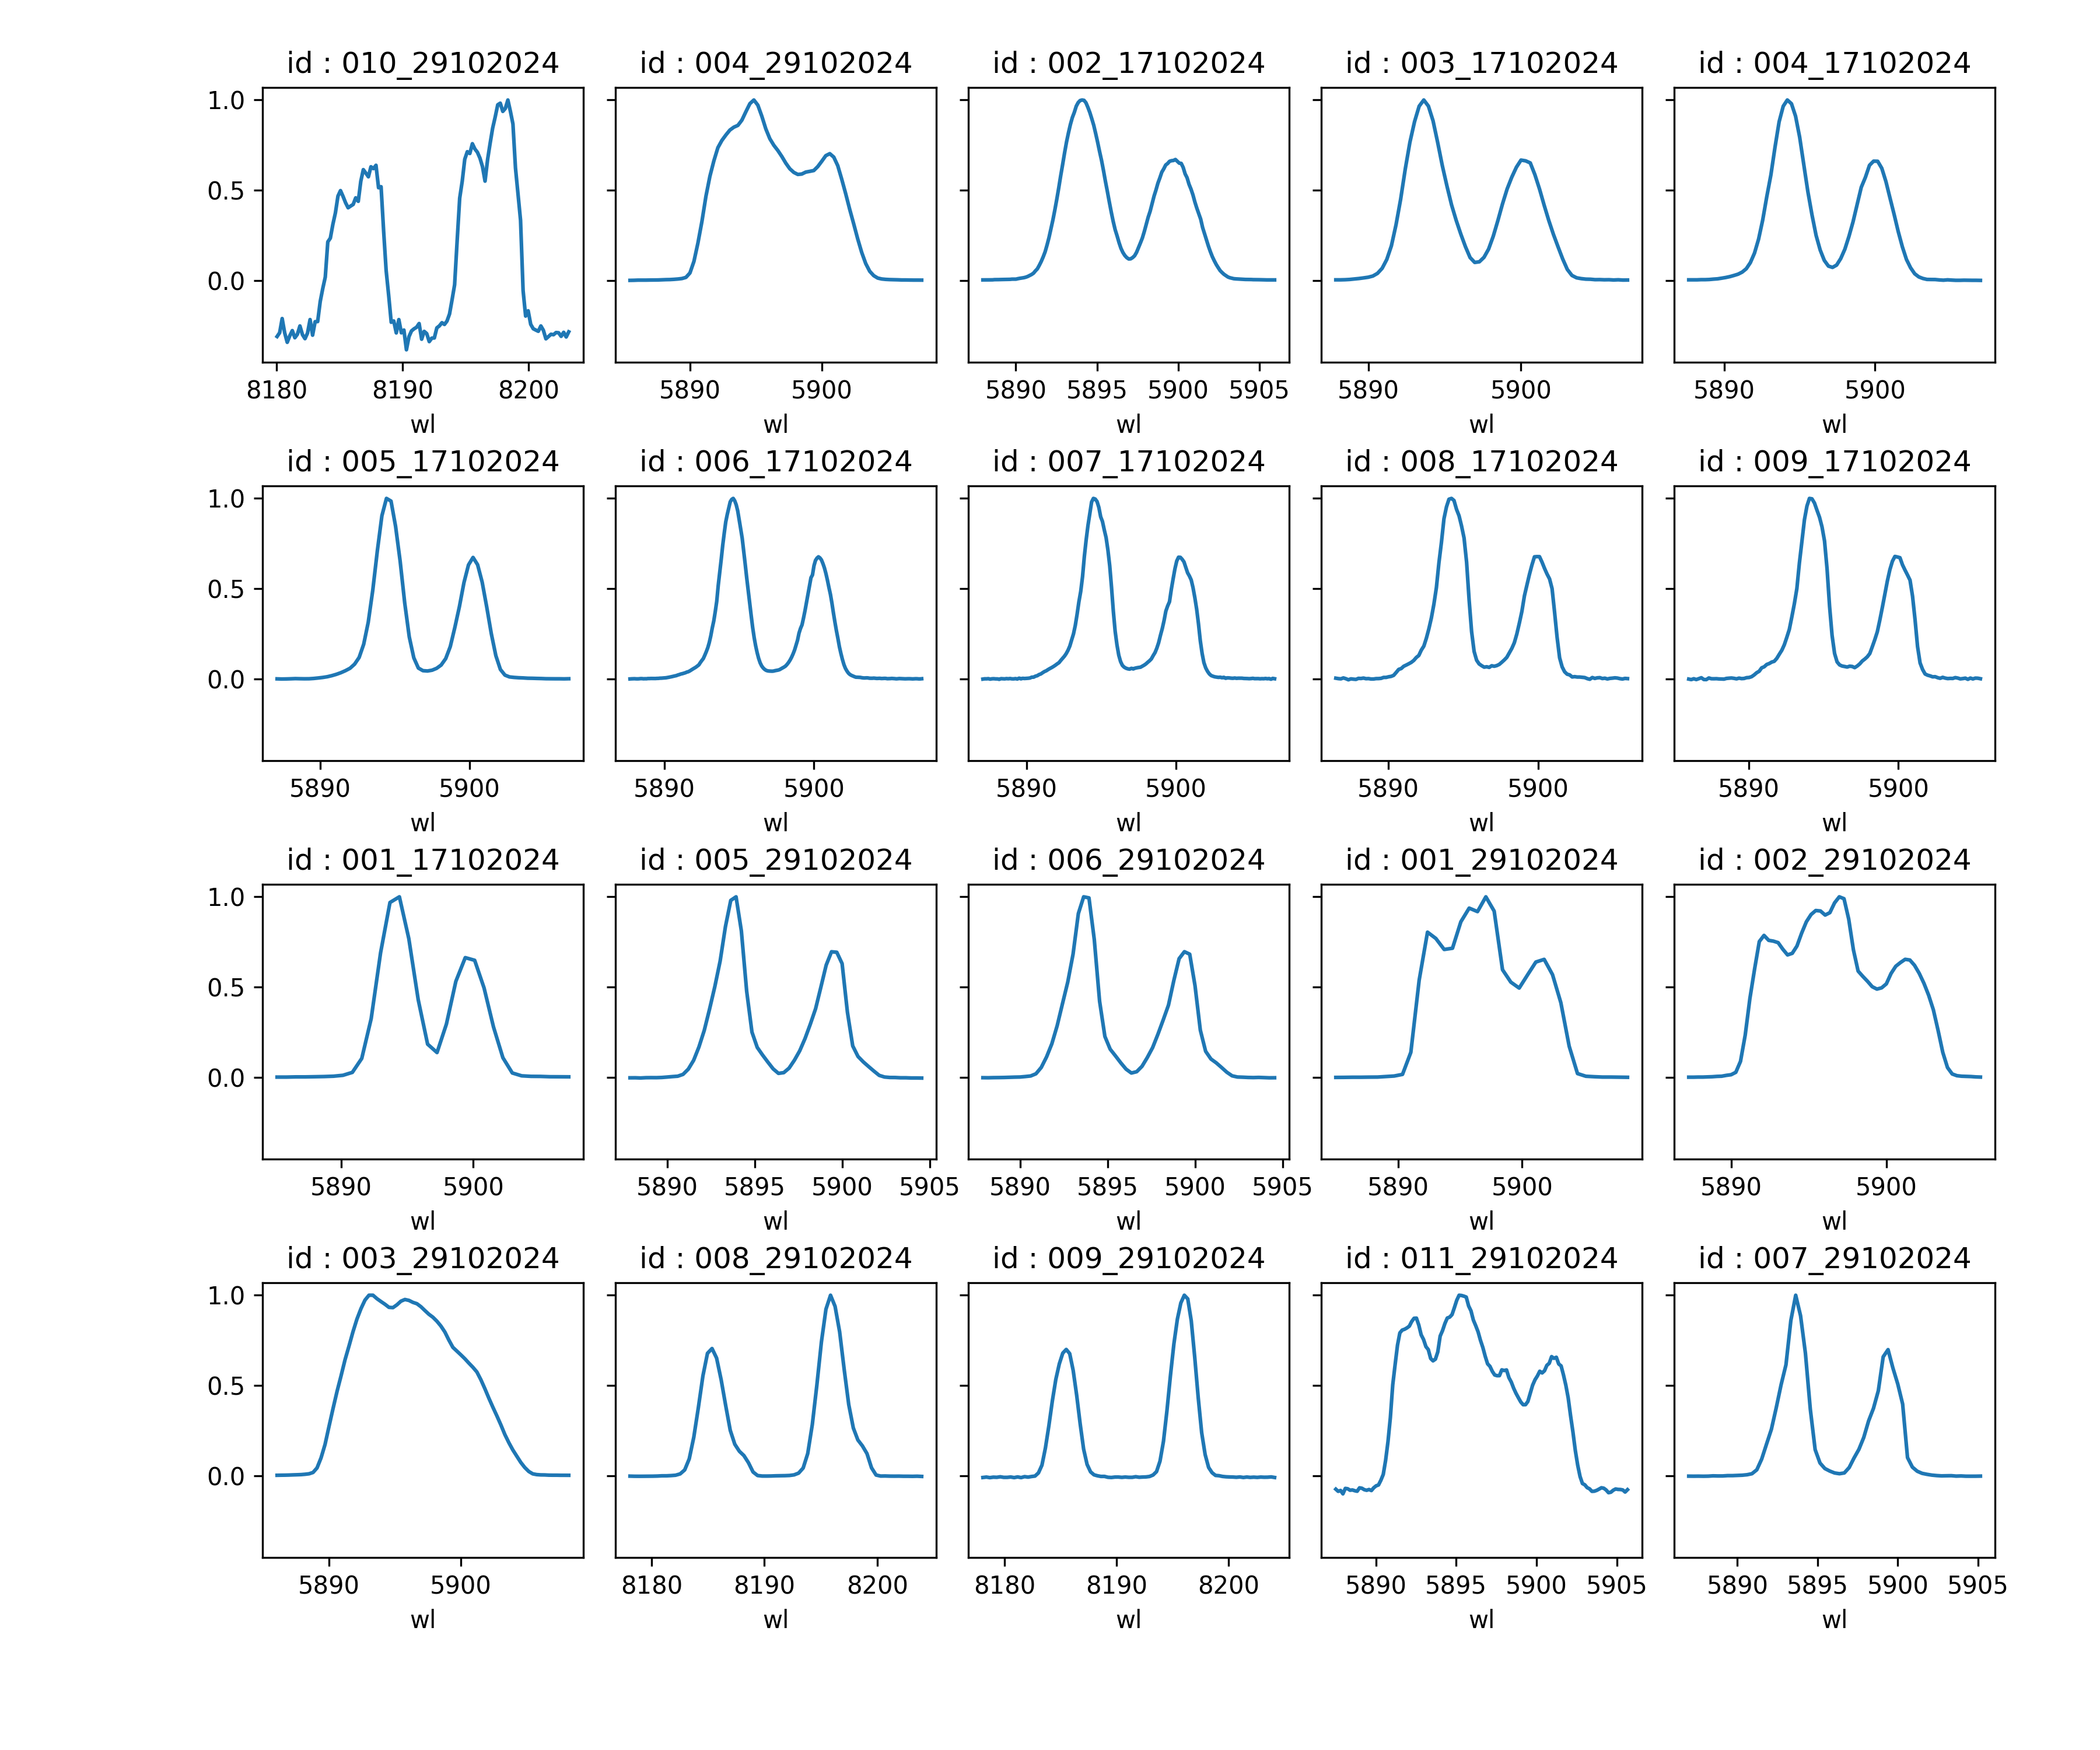

In [21]:
# plot all the data
fig, axs = plt.subplots(4, 5, figsize=(12, 10), dpi=300, sharey=True)
fig.subplots_adjust(wspace=0.10, right=0.95,
                    hspace=0.45, top=0.95)

groups = Na_Exp_df.groupby('meta')
for i, [name, group] in enumerate(groups):
    ax = axs.flatten()[i]
    group['mean'] = group['mean'] / group['mean'].max()
    group.plot('wl', 'mean', ax=ax)
    ax.set_title(f'id : {name[-12:]}')
    ax.get_legend().remove()

LinregressResult(slope=2.3791358473671114e-09, intercept=-2.0660731825375357e-05, rvalue=0.14446526227711068, pvalue=0.5321177751007509, stderr=3.738515120576647e-09, intercept_stderr=3.0624290762489725e-05)
Bbox(x0=8182.0, y0=1e-06, x1=8189.0, y1=5.6e-05)
[[Variables]]
    amp_1:    2.6553e-04 (init = 0.00022)
    cen_1:    8185.38634 (init = 8185.5)
    sig_1:    1.07588362 (init = 0.9)
    gamma_1: -0.13491379 (init = 0.9)
    amp_2:    3.7857e-04 (init = 0.00035)
    cen_2:    8195.97803 (init = 8196)
    sig_2:    1.05206952 (init = 0.9)
    gamma_2: -0.09943187 (init = 0.9)
    y0:       1.2000e-06 (init = 1.2e-06)


C:\Users\alber\AppData\Local\Temp\ipykernel_1044\377279737.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


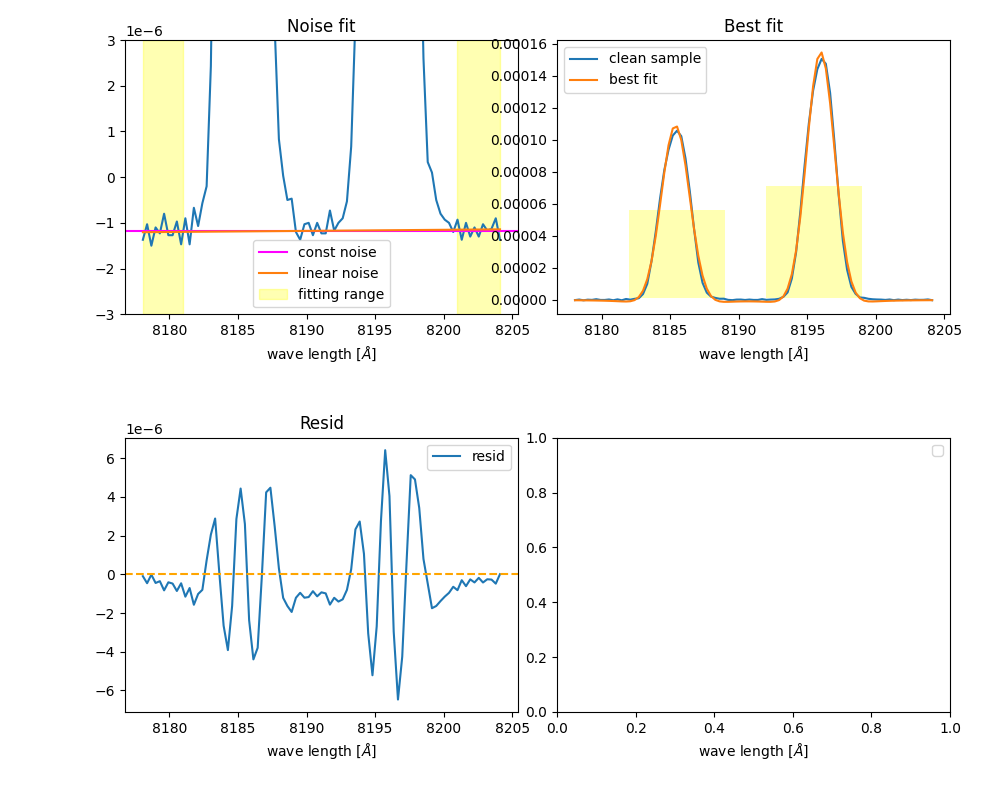

In [27]:
from lmfit import Minimizer, create_params, report_fit
from lmfit.lineshapes import gaussian, lorentzian, voigt
from scipy.stats import linregress
from pprint import pprint
from matplotlib.patches import Rectangle

# fitting at 800nm
sample = Na_Exp_df[Na_Exp_df['meta'] == 'Na_300ms_600V_1tac_out1tac_307Hz_009_29102024']
wl = sample['wl']
mean = sample['mean']

def residual(pars, x, data):
    model = (voigt(x, pars['amp_1'], pars['cen_1'], pars['sig_1'], pars['gamma_1']) +
             voigt(x, pars['amp_2'], pars['cen_2'], pars['sig_2'], pars['gamma_2']))
    return model - data

pfit = create_params(amp_1 = 0.00022, cen_1 = 8185.5, sig_1 = 0.9, gamma_1 = 0.9,
                     amp_2 = 0.00035, cen_2 = 8196, sig_2 = 0.9, gamma_2 = 0.9,
                     y0 = 1.2e-6)
# pfit['y0'].set(vary=False)
# pfit['cen_1'].set(value = 8185.46, vary=False)
# pfit['cen_2'].set(value = 8196.06, vary=False)

# fit the noise
noise_edgs = {'below' : 8181,
              'above' : 8201}
noise = sample[(wl < noise_edgs['below']) | (wl > noise_edgs['above'])]
res = linregress(*noise[['wl', 'mean']].to_numpy().T)
pprint(res)

# remove the noise and fit
clean_sample = sample.copy()
clean_sample['mean'] = sample['mean'] - np.polyval(res[:2], wl)

# do not fit the peaks and the far tails
peak1 = Rectangle((8182,1e-6), 7, 5.5e-5, edgecolor='none', facecolor='yellow', alpha = 0.3)
peak2 = Rectangle((8192,1e-6), 7, 7e-5, edgecolor='none', facecolor='yellow', alpha = 0.3)
print(peak1.get_bbox())


mini = Minimizer(residual , pfit, fcn_args=(wl, clean_sample['mean']))
out = mini.leastsq()
best_fit = clean_sample['mean'] + out.residual
report_fit(out.params)

fig, axs = plt.subplots(2,2, figsize=(10,8))
fig.subplots_adjust(wspace=0.10, right=0.95,
                    hspace=0.45, top=0.95)
axs = axs.flatten()

axs[0].set_title('Noise fit')
axs[0].set(ylim=(-3e-6, 3e-6))
axs[0].plot(*sample[['wl','mean']].to_numpy().T)
axs[0].axhline(noise['mean'].mean(), c = 'magenta', label='const noise')
axs[0].plot(wl, np.polyval(res[:2], wl), label = 'linear noise')
axs[0].axvspan(wl.min(), noise_edgs['below'], color='yellow', alpha=0.3, label='fitting range')
axs[0].axvspan(noise_edgs['above'], wl.max(), color='yellow', alpha=0.3)

axs[1].set_title('Best fit')
axs[1].plot(*clean_sample[['wl','mean']].to_numpy().T, label='clean sample')
axs[1].plot(wl, best_fit, label='best fit')
axs[1].add_patch(peak1)
axs[1].add_patch(peak2)

axs[2].set_title('Resid')
axs[2].plot(wl, out.residual, label='resid')
axs[2].axhline(0, c='orange', ls='--')

for ax in axs:
    ax.legend()
    ax.set(xlabel=r'wave length $[\AA]$')



## Laser
Iniziamo l'analisi dallo spettro del laser poiché è il più semplice, consistendo di un solo picco

meta
laser_300ms_400V_1tac_out1tac_307Hz_001_29102024    Axes(0.125,0.11;0.775x0.77)
laser_300ms_400V_1tac_out1tac_307Hz_002_29102024    Axes(0.125,0.11;0.775x0.77)
dtype: object

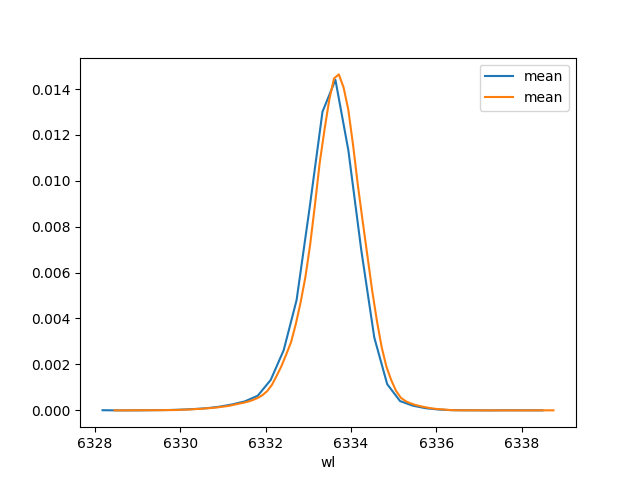

In [23]:
from scipy.stats import cauchy

laser_spectrum = utils.getFiles('Cleaned_Data\\Laser_Spectrum')
laser_spectrum = utils.dfFormFiles(laser_spectrum, index_col=0)

fig, ax = plt.subplots()
laser_spectrum.groupby('meta').plot('wl', 'mean', ax=ax)

[2.62935519e-02 6.33368338e+03 5.36532238e-01]


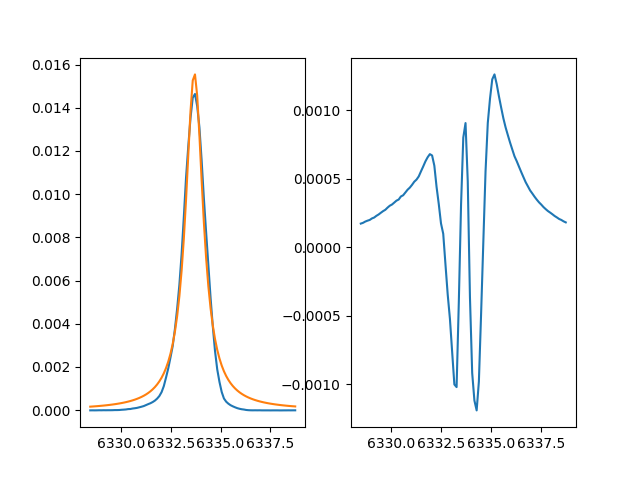

In [24]:
# select the best measure and do a fit
sample = laser_spectrum[laser_spectrum['meta'] == 'laser_300ms_400V_1tac_out1tac_307Hz_002_29102024']
fit = lambda x, A, mu, gamma : A * cauchy.pdf(x, mu, gamma)

p0 = (3, 6330, 0.5)
popt, pcov = curve_fit(fit, sample['wl'], sample['mean'], p0=p0)
print(popt)

wl = sample['wl']
mean = sample['mean']

fig, axs = plt.subplots(1,2)
axs[0].plot(wl, mean)
axs[0].plot(wl, popt[0] * cauchy.pdf(wl, popt[1], popt[2]))
axs[1].plot(wl, popt[0] * cauchy.pdf(wl, popt[1], popt[2]) - mean)

Sembrerebbe che si siano due picchi e non uno!

In [25]:
# select the best measure and do a fit
sample = laser_spectrum[laser_spectrum['meta'] == 'laser_300ms_400V_1tac_out1tac_307Hz_002_29102024']
fit = lambda x, A, mu, gamma : A * cauchy.pdf(x, mu, gamma)
def fit2 (x, A, muA, gammaA, B, muB, gammaB):
    print(x, A, muA, gammaA, B, muB, gammaB) 
    A * cauchy.pdf(x, muA, gammaA) + B * cauchy.pdf(x, muB, gammaB)

p0 = (1.5, 6333, 0.5, 1.5, 6330, 0.5)
popt, pcov = curve_fit(fit2, sample['wl'], sample['mean'], p0=p0, method='trf')
print(popt)

wl = sample['wl']
mean = sample['mean']

fig, axs = plt.subplots(1,2)
axs[0].plot(wl, mean)
axs[0].plot(wl, popt[0] * cauchy.pdf(wl, popt[1], popt[2]))
axs[1].plot(wl, popt[0] * cauchy.pdf(wl, popt[1], popt[2]) - mean)

35     6328.4630
36     6328.5747
37     6328.6865
38     6328.7990
39     6328.9106
         ...    
123    6338.2970
124    6338.4087
125    6338.5186
126    6338.6310
127    6338.7427
Name: wl, Length: 93, dtype: float64 1.5 6333.0 0.5 1.5 6330.0 0.5


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'